In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("../data/raw/stock_prices_data_cleaning.csv")

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB
None
  symbol        date      open      high       low     close    volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391


In [12]:
df.columns = df.columns.str.strip()       # remove leading/trailing spaces
df.columns = df.columns.str.lower()       # make all lowercase
print(df.columns.tolist())


['symbol', 'date', 'open', 'high', 'low', 'close', 'volume']


In [13]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.set_index('date')
print(df.head())
print(df.index)


           symbol      open      high       low     close    volume
date                                                               
2014-01-02    AAL   25.0700   25.8200   25.0600   25.3600   8998943
2014-01-02   AAPL   79.3828   79.5756   78.8601   79.0185  58791957
2014-01-02    AAP  110.3600  111.8800  109.2900  109.7400    542711
2014-01-02   ABBV   52.1200   52.3300   51.5200   51.9800   4569061
2014-01-02    ABC   70.1100   70.2300   69.4800   69.8900   1148391
DatetimeIndex(['2014-01-02', '2014-01-02', '2014-01-02', '2014-01-02',
               '2014-01-02', '2014-01-02', '2014-01-02', '2014-01-02',
               '2014-01-02', '2014-01-02',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-29'],
              dtype='datetime64[ns]', name='date', length=497472, freq=None)


In [14]:
print(df.isnull().sum())


symbol     0
open      11
high       8
low        8
close      0
volume     0
dtype: int64


In [17]:
df = df.ffill()

print(df.isnull().sum())



symbol    0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [18]:
print(df.duplicated().sum())
df = df.drop_duplicates()


753


In [19]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check again
print("Duplicates after removal:", df.duplicated().sum())


Duplicates after removal: 0


In [20]:
print(df.describe())


                open           high            low          close  \
count  496719.000000  496719.000000  496719.000000  496719.000000   
mean       86.364414      87.144841      85.564124      86.381428   
std       101.525315     102.366726     100.624573     101.527228   
min         1.620000       1.690000       1.500000       1.590000   
25%        41.690000      42.090000      41.280000      41.700000   
50%        64.970000      65.560000      64.350000      64.980000   
75%        98.400000      99.230000      97.570000      98.420000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  4.967190e+05  
mean   4.256770e+06  
std    8.237596e+06  
min    0.000000e+00  
25%    1.080474e+06  
50%    2.086220e+06  
75%    4.275086e+06  
max    6.182376e+08  


In [21]:
apple_df = df[df['symbol'] == 'AAPL']
print(apple_df.head())


           symbol     open     high      low    close     volume
date                                                            
2014-01-02   AAPL  79.3828  79.5756  78.8601  79.0185   58791957
2014-01-03   AAPL  78.9799  79.0999  77.2042  77.2828   98303870
2014-01-06   AAPL  76.7785  78.1142  76.2285  77.7042  103359151
2014-01-07   AAPL  77.7599  77.9942  76.8464  77.1481   79432766
2014-01-08   AAPL  76.9728  77.9371  76.9556  77.6371   64686685


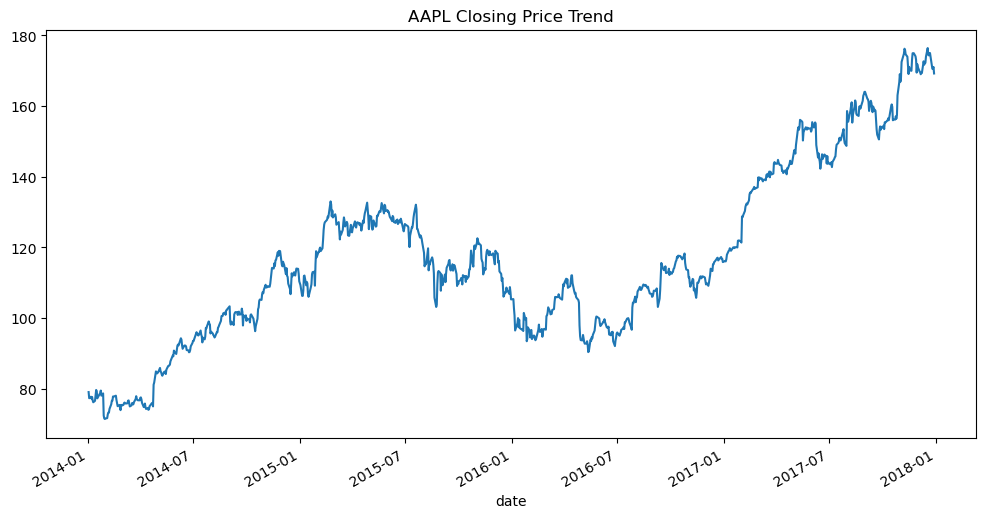

In [27]:
# Filter only AAPL rows (date is already the index!)
aapl_df = df[df['symbol'] == 'AAPL']

# Plot closing price trend
aapl_df['close'].plot(figsize=(12,6), title="AAPL Closing Price Trend")
plt.show()



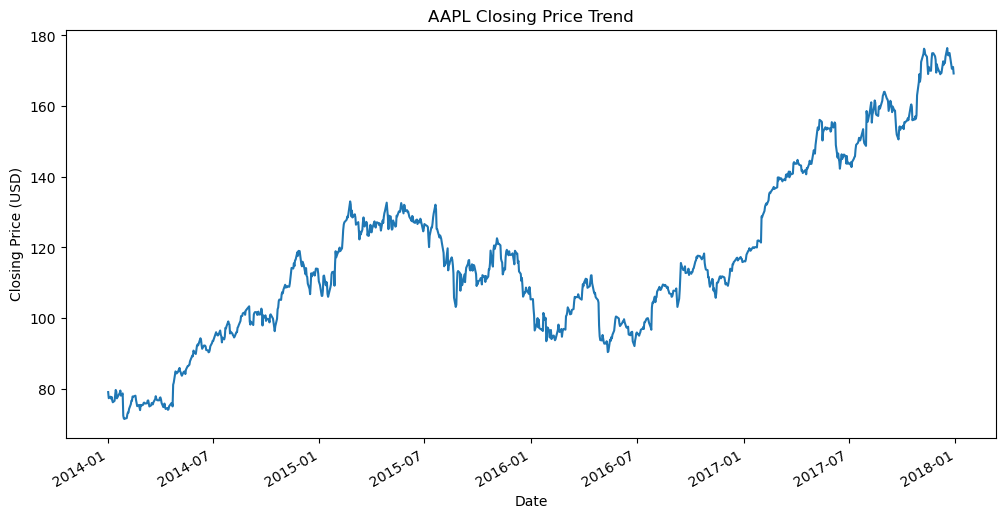

In [28]:
# Filter only AAPL rows (date is already the index)
aapl_df = df[df['symbol'] == 'AAPL']

# Plot closing price trend
plt.figure(figsize=(12,6))
aapl_df['close'].plot(title="AAPL Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


In [30]:
monthly = apple_df['close'].resample('ME').mean()
print(monthly.head())


date
2014-01-31    76.777876
2014-02-28    75.225637
2014-03-31    76.173400
2014-04-30    77.296243
2014-05-31    86.170752
Freq: ME, Name: close, dtype: float64


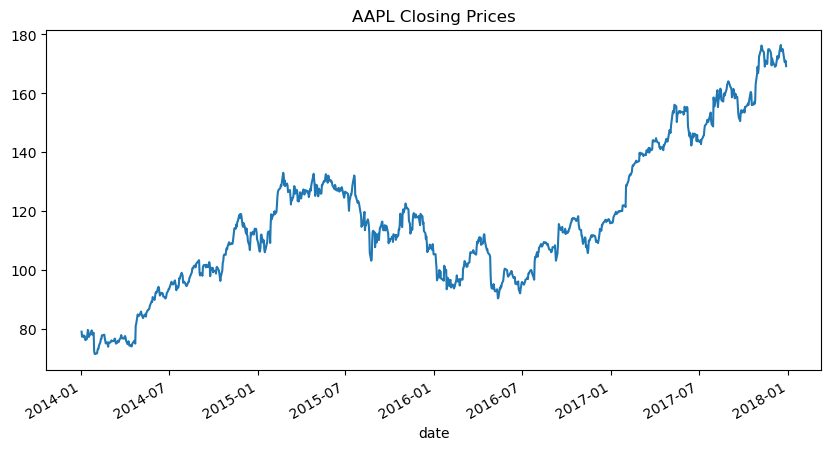

In [31]:
apple_df['close'].plot(title="AAPL Closing Prices", figsize=(10,5))
plt.show()


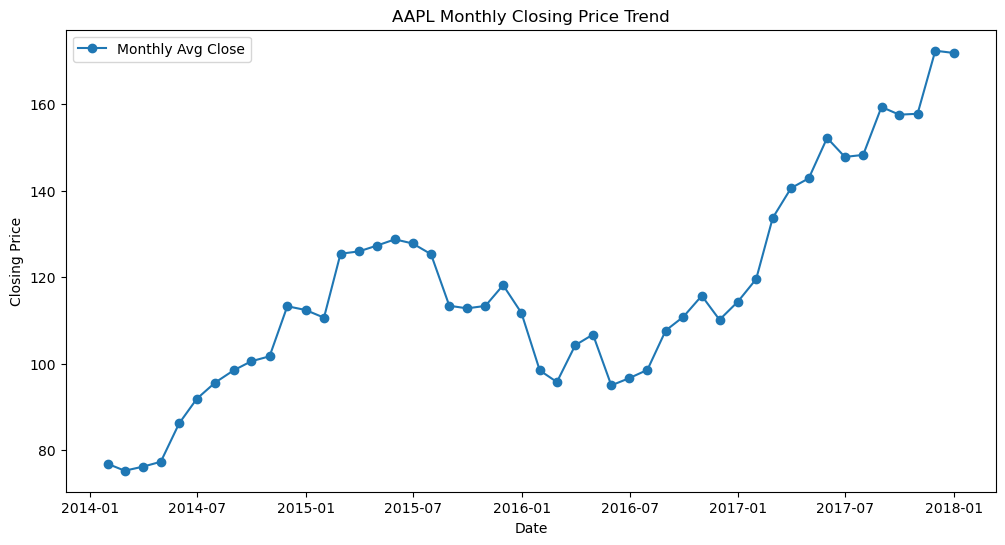

In [33]:
# --- Monthly Trend ---
aapl_monthly = aapl_df['close'].resample("ME").mean()

plt.figure(figsize=(12,6))
plt.plot(aapl_monthly, marker='o', label="Monthly Avg Close")
plt.title("AAPL Monthly Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


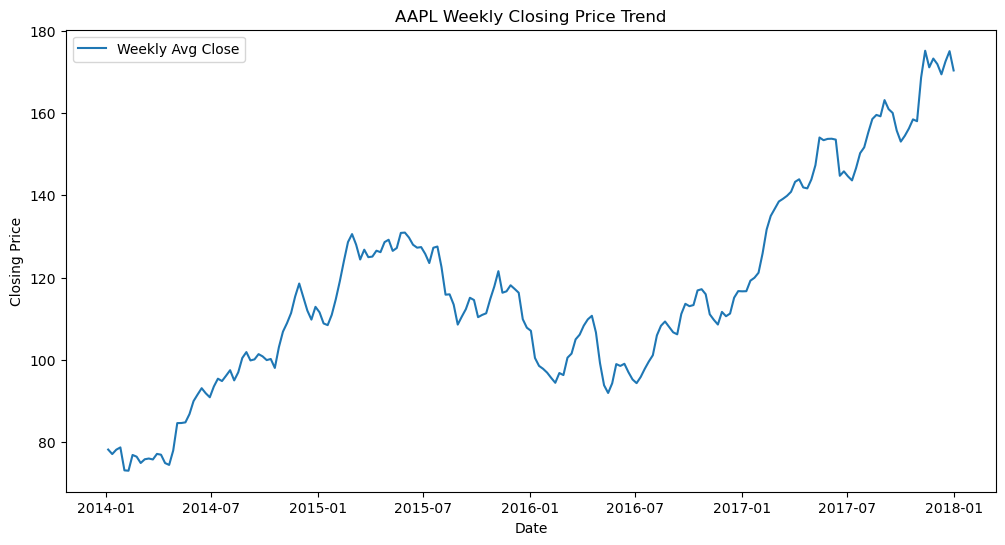

In [34]:
# --- Weekly Trend ---
aapl_weekly = aapl_df['close'].resample("W").mean()

plt.figure(figsize=(12,6))
plt.plot(aapl_weekly, label="Weekly Avg Close")
plt.title("AAPL Weekly Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

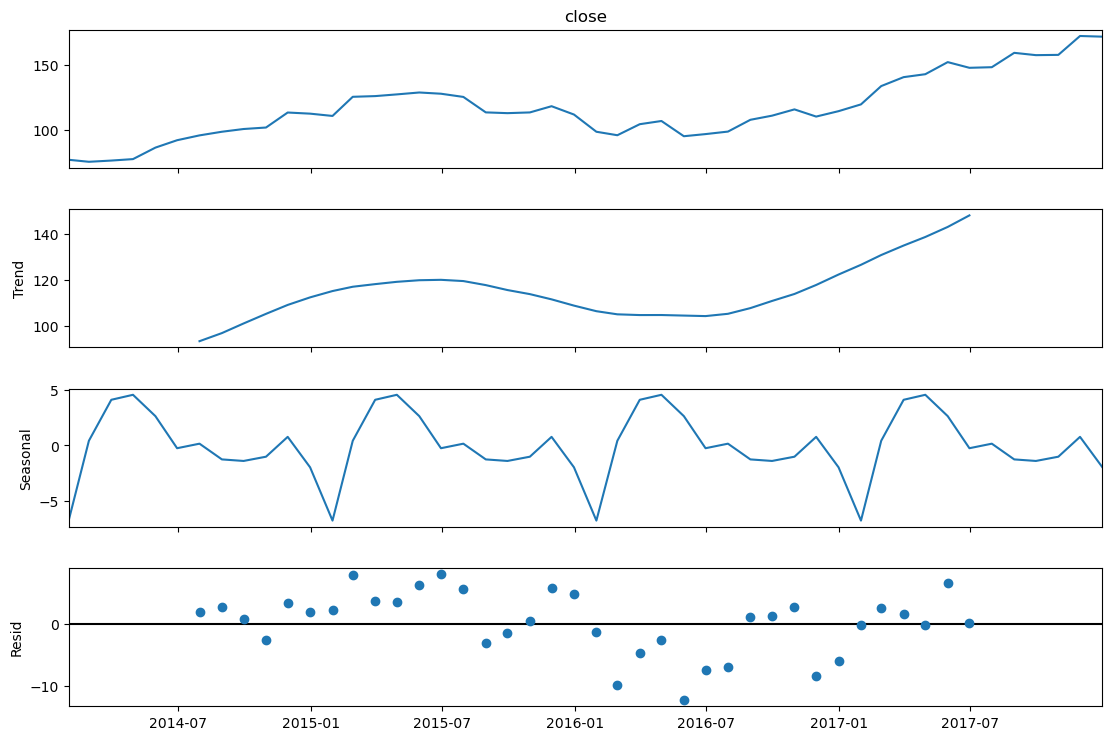

In [36]:
# --- Time Series Decomposition (on monthly data) ---
decomposition = seasonal_decompose(aapl_monthly, model="additive", period=12)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [ ]:
#Here’s a short step-by-step description of what you did with the stock_prices_data_cleaning.csv dataset (2nd task style):

##Check structure → Used .info() and .head() to see columns and sample rows.

#Clean columns → Converted date column to datetime and set it as index.

#Handle missing values → Forward filled (ffill) missing prices.

#Remove duplicates → Checked and dropped duplicate rows.

#Basic summary → Used .describe() for open, high, low, close, volume.

#Filter one stock → Focused on "AAPL" data only.

#Daily trend → Plotted AAPL closing price over time.

#Resample data → Converted daily data into monthly/weekly averages.

#Trend chart → Plotted monthly closing price trend.

#Time series decomposition → Broke down monthly trend into Trend + Seasonality + Residuals.